## Read Data

In [2]:
import numpy as np
import pandas as pd
import sklearn
from collections import Counter


In [3]:
df = pd.read_csv("data/train.csv")

## Overview of Data

In [4]:
print(f"Shape of dataframe: {df.shape}")
print(f"Categorical cols: {df.select_dtypes(include=['object']).columns}\n")
print(f"Numerical cols: {df.select_dtypes(exclude=['object']).columns}")

Shape of dataframe: (381109, 12)
Categorical cols: Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

Numerical cols: Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [5]:
# change id to index
df.set_index('id', inplace=True)

In [6]:
# Get a better feel for the data by shoiwing each columns unique attributes
print(df.apply(pd.Series.unique))

Gender                                                     [Male, Female]
Age                     [44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...
Driving_License                                                    [1, 0]
Region_Code             [28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...
Previously_Insured                                                 [0, 1]
Vehicle_Age                               [> 2 Years, 1-2 Year, < 1 Year]
Vehicle_Damage                                                  [Yes, No]
Annual_Premium          [40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...
Policy_Sales_Channel    [26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...
Vintage                 [217, 183, 27, 203, 39, 176, 249, 72, 28, 80, ...
Response                                                           [1, 0]
dtype: object


# Preprocessing

## Deduplication

In [10]:
# Check if duplicate IDs exist
if not df.index.is_unique:
    # Deduplicate id
    df.loc[~df.index.duplicated(), :]


In [12]:
# Check how many rows are identical (for commentary purposes)
df.duplicated().value_counts()

False    380840
True        269
dtype: int64

In [34]:
df.select_dtypes(include=["category", "object"]).head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
id,,,,,,,,
1,Male,1,28.0,0,> 2 Years,Yes,26.0,1
2,Male,1,3.0,0,1-2 Year,No,26.0,0
3,Male,1,28.0,0,> 2 Years,Yes,26.0,1
4,Male,1,11.0,1,< 1 Year,No,152.0,0
5,Female,1,41.0,1,< 1 Year,No,152.0,0


In [13]:
df[df.duplicated()]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
35755,Male,23,1,15.0,0,< 1 Year,No,2630.0,152.0,173,0
41516,Male,39,1,30.0,0,1-2 Year,Yes,2630.0,124.0,27,0
43619,Male,40,1,28.0,1,1-2 Year,No,2630.0,124.0,209,0
44050,Male,39,1,28.0,0,1-2 Year,Yes,2630.0,124.0,64,0
44204,Male,44,1,28.0,0,> 2 Years,Yes,2630.0,124.0,155,1
...,...,...,...,...,...,...,...,...,...,...,...
379274,Male,58,1,30.0,1,1-2 Year,No,2630.0,152.0,150,0
379452,Male,41,1,30.0,0,1-2 Year,Yes,2630.0,156.0,111,0
379789,Male,38,1,28.0,1,1-2 Year,No,2630.0,124.0,42,0


There are 269 rows that have at least one duplicate out of 380,000 results, therefore we don't need to clean anything up. 

## Categorical and Numerical Transformations

In [25]:
# We need to adjust a few of the variables which are currently numeric and need to be categorical
cols_to_cat = ["Driving_License", "Previously_Insured", "Policy_Sales_Channel", "Region_Code", "Response"]
df[cols_to_cat] = df[cols_to_cat].astype("category")

## Null Values

In [15]:
# Check that there are no null values
print(f"{df.info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                381109 non-null  object  
 1   Age                   381109 non-null  int64   
 2   Driving_License       381109 non-null  category
 3   Region_Code           381109 non-null  float64 
 4   Previously_Insured    381109 non-null  category
 5   Vehicle_Age           381109 non-null  object  
 6   Vehicle_Damage        381109 non-null  object  
 7   Annual_Premium        381109 non-null  float64 
 8   Policy_Sales_Channel  381109 non-null  category
 9   Vintage               381109 non-null  int64   
 10  Response              381109 non-null  int64   
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 37.6+ MB
None


In [16]:
# If there are null
print(df.isnull().sum())

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


### Imputation

In [37]:
for col in df.select_dtypes(include=["category", "object"]):
    df[col].fillna(df[col].mode(), inplace=True)

In [ ]:
# Imputation helper functions
def impute_categorical_stratified(df, on, column, strategy="mode"):
    """
    Stratified imputation by a categorical column on 
    another categorical column.
    Args:
        df (DataFrame): dataframe containing the data with missing vals
        on (str): column to stratify
        column (str): column to impute
        strategy (str): strategy to use (mode)
    Returns:
        df (DataFrame): dataframe with imputed missing values
    """
    frames = []
    for cat in list(set(df[on])):
        df_cat = df[df[column] == cat]
        # Ensure there are multiple rows, otherwise use mode of entire col 
        if len(df_cat) > 1:    
            df_cat[column].fillna(df_cat[column].mode()[0], inplace = True)        
        else:
            df_cat[column].fillna(df[column].mode()[0], inplace = True)
        frames.append(df_cat)
        cat_df = pd.concat(frames)
    return cat_df

In [1]:
# If there were null values you have to choose to drop or impute

# If there are too many nulls in a column, drop the column
# df.drop(columns=["colname"], inplace=True)

# A simple impute of numerical variables
# df['Annual_Premium'].fillna(df['Annual_Premium'].mean()) inplace = True)

# A simple impute of categorical variables (most frequent)
# df['col'].fillna(df['col'].mode()[0])



### Interpolation

The imputation strategy chosen was mean for numerical features and mode for categorical as a simple and fast approach that is easy to understand and explain.
After an initial model is trained and evaluated, and with more time, I would consider different approaches. I would investigate the missing values in more detail and consider other imputation strategies including stratification, knn, multivariate imputation by chained equation (MICE). Adding a binary feature (is_missing) may improve the results by providing more information to the model as there could be a reason those values are missing and a correlation between the missingness and the label.

## Normalize

In [26]:
df.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


In [41]:
df.select_dtypes(exclude=["category", "object"]).apply(lambda x: x/x.max(), axis=0).describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,0.456736,0.056583,0.516212
std,0.182490,0.031866,0.279837
min,0.235294,0.004869,0.033445
25%,0.294118,0.045181,0.274247
50%,0.423529,0.058628,0.515050
75%,0.576471,0.072941,0.759197
max,1.000000,1.000000,1.000000


In [66]:
df.dropna(subset=["Response"])


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0


In [67]:
from time import time
now = time()

In [71]:
df.sample(1000, random_state=42).shape

(1000, 11)

In [70]:
later = time()
print(f"diff {later-now:.2f}")

diff 30.03


<AxesSubplot:>

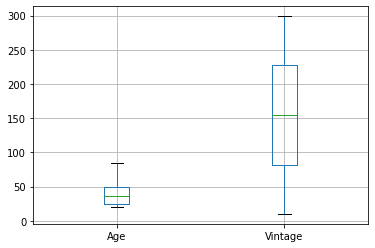

In [27]:
df.drop('Annual_Premium', axis=1).boxplot()

<AxesSubplot:>

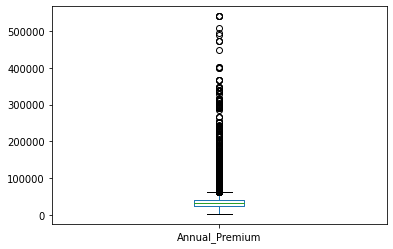

In [30]:
df['Annual_Premium'].plot.box()

From the description we can see that 
- Average age is 39
annual premium has a significantly different distribution.
 

## Exploratory Data Analysis

In [32]:
# Fast and efficient way to create a dictionary out of a categorical column
print(Counter(df.Response))

Counter({0: 334399, 1: 46710})


In [48]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

In [53]:
cat_cols

['Gender',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 'Response']

In [61]:
print("Setting index and renaming label col") if True is True else ""

Setting index and renaming label col


In [55]:
cat_cols.remove("Response")

ValueError: list.remove(x): x not in list

In [63]:
import logging
logging.basicConfig(level=logging.DEBUG)
logging.info("Hellko")
logging.debug("Message")
logging.warning("BLA")

INFO:root:Hellko
DEBUG:root:Message


In [62]:
df.shape

(381109, 11)

In [58]:
pd.get_dummies(df, columns=cat_cols)


,Age,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Driving_License_0,Driving_License_1,Region_Code_0.0,Region_Code_1.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
id,,,,,,,,,,,,,,,,,,,,,
1,44,40454.0,217,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,76,33536.0,183,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,38294.0,27,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,28619.0,203,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5,29,27496.0,39,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,74,30170.0,88,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
381106,30,40016.0,131,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
381107,21,35118.0,161,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.boxplot()

In [ ]:
print("Number of categorical")